# Russia-Ukraine Crisis Visualization

## Authors: Sushanth Sreenivasa Babu, Divya Tantri, Adit Rathi



The dashboard we have created here shows the losses with respect to equipment ranging from: aircraft, helicopter, tank, APC, field artillery, MRL, military auto, fuel tank, drone, naval ship, anti-aircraft warfare, special equipment, mobile SRBM system for the day of the week and shows what the day it is on the y axis. We have created a heatmap to show the day of the week and the days of the war. The dashboard also has the capability to populate a bar chart for the number of equipment loss when a portion of the heatmap is selected. This is part of our interactivity in the dashboard. Additionally, the heatmap also drives another plot that shows the cummulative personnel losses vs the equipment losses till the day selected.

We have further analysed a twitter dataset consisting tweets related to the on going conflict. On Kaggle, we discovered this fascinating dataset. https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-million-rows This collection contains daily Twitter datasets related to the ongoing Ukraine-Russia conflict. The information includes whether a tweet was retweeted or not, as well as people's views on the Russia-Ukraine conflict. It can also assist us in gathering information from trustworthy or government sources. We have included two visualizations for this dataset that visualize the top languages in which the tweets have been made and top locations where the Russia-Ukraine is most discussed about on twitter. 

Team member Adit prepared the twitter data for further analysis. I learnt about collectively importing compressed csv files into a single data frame. This was challenging as the size of the data was almost 6 gigabytes. After Data Cleaning, I was able to drop the unnecessary columns and reduce the size of the dataset to around 60 kilobytes. We decided to drop columns of text, hashtags and acctdesc in order to cut most of the bulk. We decide to analyse numeric data of the twitter dataset in this section. I further explored the library of seaborn and used the same for visualizing twitter data. I learnt about interactivity between plots from Team member Divya Tantri and about bqplot interactivity from team member Sushanth Sreenivasa.

Team member Divya Tantri worked on the central visualization with team mate Sushanth Sreenivasa.
I learnt more about interactivity between plots and the limitations of a few packages.Our team has created a central visualization using matplotlib. I learnt more about data cleaning processes from team member Adit Rathi and learnt about drop down and bqplot interactivity from team member Sushanth Sreenivasa.

## Group work plan and Challenges faced and things we would like to do differently

As per our group work plan, we decided to create a central visualization based on the equipment and personnel loss dataset. We decided to use the twiter dataset to add contextual visualizations. 
One of the major difficulties we faced was dealing with the twitter data. The dataset file consisted of multiple compresse csvs. It was an interesting challenge to figure out how to combine this in a single dataframe. Due to the magnitude of the data, the compilation time for just importing the data was almost 40 minutes. Hence, the team decided to drop unnecessary columns that reduced the size of the data set. We exported this dataset and visualized the clean data.

In [1]:
import numpy as np
import pandas as pd
import datetime
import ipywidgets as ipy
import seaborn as sns
import os
import gc
import bqplot
import bqplot.pyplot
import ipywidgets as ipy
import matplotlib.pyplot as plt

# Section 1

Russia may have lost 25% of its original assault force in four weeks of warfare. These losses are not on the magnitude of World War II, but they are significant when compared to the Russian military's current strength. Although reinforcements and replacements can help to offset some of these losses, the loss of trained personnel will impede military operations and have a political impact. The dashboard indicates how losses have mount up on the Russian side as the war proceeded. This dashboard lets the user segregate the russian losses equipment wise as well as stats on loss of personell. 

In [2]:
df = pd.read_csv("russia_losses_equipment.csv") # Equipment data
df1 = pd.read_csv("russia_losses_personnel.csv") # Personnel data

eq = df[[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']] # Equipments

df["Total"] = eq.sum(axis=1) # Total Equipment loss

# Merging the datasets into one dataframe
df['personnel'] = df1['personnel']
df['POW'] = df1['POW']
df
df['personnel loss per day'] = df['personnel'].diff() 
df['equipment loss per day'] = df['Total'].diff()
df.loc[(df['personnel loss per day'].isnull()),
       'personnel loss per day'] = df.loc[(df['personnel loss per day'].isnull()), 'personnel']
df.loc[(df['equipment loss per day'].isnull()), 
       'equipment loss per day'] = df.loc[(df['equipment loss per day'].isnull()), 'Total']
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].apply(lambda x: x.strftime('%A'))
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,Total,personnel,POW,personnel loss per day,equipment loss per day,day_of_week
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,2,0,NaN,NaN,828.0,2800,0,2800.0,828.0,Friday
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,2,0,NaN,NaN,1152.0,4300,0,1500.0,324.0,Saturday
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,2,0,NaN,NaN,1157.0,4500,0,200.0,5.0,Sunday
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,2,5,NaN,NaN,1480.0,5300,0,800.0,323.0,Monday
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,2,7,NaN,NaN,1580.0,5710,200,410.0,100.0,Tuesday


In [3]:
# Preping data for the heatmap
df_heat = df.groupby(['day_of_week', 'day'])['equipment loss per day'].sum()
df_heat = df_heat.unstack(level=0).round(2)
df_heat.head()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
day,,,,,,,
2,828.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,324.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,323.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,100.0,NaN


In [4]:
#bar_plot - Cummulative Equipment Loss vs Equipment Type

x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale() 


x_axs = bqplot.Axis(label='Equipment Type', scale=x_scs, tick_rotate=45)
y_axs = bqplot.Axis(label='Cummulative Equipment Loss', scale=y_scs, 
                   orientation = 'vertical')


barpl = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs})

fig_barpl = bqplot.Figure(marks=[barpl], axes=[x_axs,y_axs])
fig_barpl.layout.width='100%'

In [5]:
#bar_plot - Cummulative Personnel Loss and Equipment Loss (Additional Plot for Group Submission)

x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale() 


x_axs = bqplot.Axis(scale=x_scs)
y_axs = bqplot.Axis(label='Cummulative Personnel Loss and Equipment Loss', scale=y_scs, 
                   orientation = 'vertical')


barpl2 = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs}, colors = 'green')

fig_barpl2 = bqplot.Figure(marks=[barpl2], axes=[x_axs,y_axs])
fig_barpl2.layout.width='100%'

In [6]:
#Heatmap - day vs day of the week vs total equipment loss

# barplot data manipulations
def barp(a,b):
    df_ = df[(df['day_of_week'] == b) & (df['day'] == a)]
    return df_[['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 
                   'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment',
                   'mobile SRBM system']]

def barp2(a, b):
    df_ = df[(df['day_of_week'] == b) & (df['day'] == a)]
    return df_[["personnel", "Total"]]

col_sc = bqplot.ColorScale(scheme="Red", 
                           min=np.nanmin(df_heat), 
                           max=np.nanmax(df_heat))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Day of Week')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Day')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = df_heat.values,
                              row = df_heat.index, column = df_heat.columns,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipy.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = df_heat.values[i,j] # grab data value
        mySelectedLabel.value = 'Equipment Loss = ' + str(v) 
        g = barp(df_heat.index[i], df_heat.columns[j])
        k = barp2(df_heat.index[i], df_heat.columns[j])
        barpl.x = ['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 
                   'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment',
                   'mobile SRBM system']
        barpl.y = g.values
        barpl2.x = ["personnel", "Total Equipment Loss"]
        barpl2.y = k.values
        
        
# make sure we check out     
heat_map.observe(get_data_value, 'selected')

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig.layout.width='100%'
# fig_barpl.layout.min_width = '800px'

myDashboard1 = ipy.VBox([fig, fig_barpl, fig_barpl2])
myDashboard = ipy.VBox([mySelectedLabel, myDashboard1])

myDashboard # display the dashboard             

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=False, figsize=(10, 8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        # First Graph - day vs total equipment
        
        ax1.bar(df[plot1_f1], df[plot1_f2],color = 'darkorange')

        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2+" Loss")
        ax1.set_title(plot1_f1+" vs "+plot1_f2+" Loss")

        # Second Graph - day vs personnel loss
    
        ax2.plot(df[plot1_f1], df[plot2_f],color='red')
        ax2.legend(labels=[plot2_f])

        ax2.set_xlabel(plot1_f1)
        ax2.set_ylabel(plot2_f)
        ax2.set_title(plot1_f1+" vs "+plot2_f)

        # Third Graph - Histogram
        
        ax3.hist(df[plot3_f],color='skyblue')
    
        ax3.set_xlabel(plot3_f)
        ax3.set_ylabel("Count")
        ax3.set_title("Histogram of "+ plot3_f)
        
        plt.close(fig)
        return fig

Column
    [0] Row(align='center')
        [0] TextInput(name='plot1_f1', value='day')
        [1] Select(name='plot1_f2', options=['Total', 'aircraft', ...], value='Total')
    [1] Row(align='center')
        [0] Select(name='plot2_f', options=['personnel', 'POW'], value='personnel')
        [1] Select(name='plot3_f', options=['personnel loss per day',...], value='personnel loss per day')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00101')
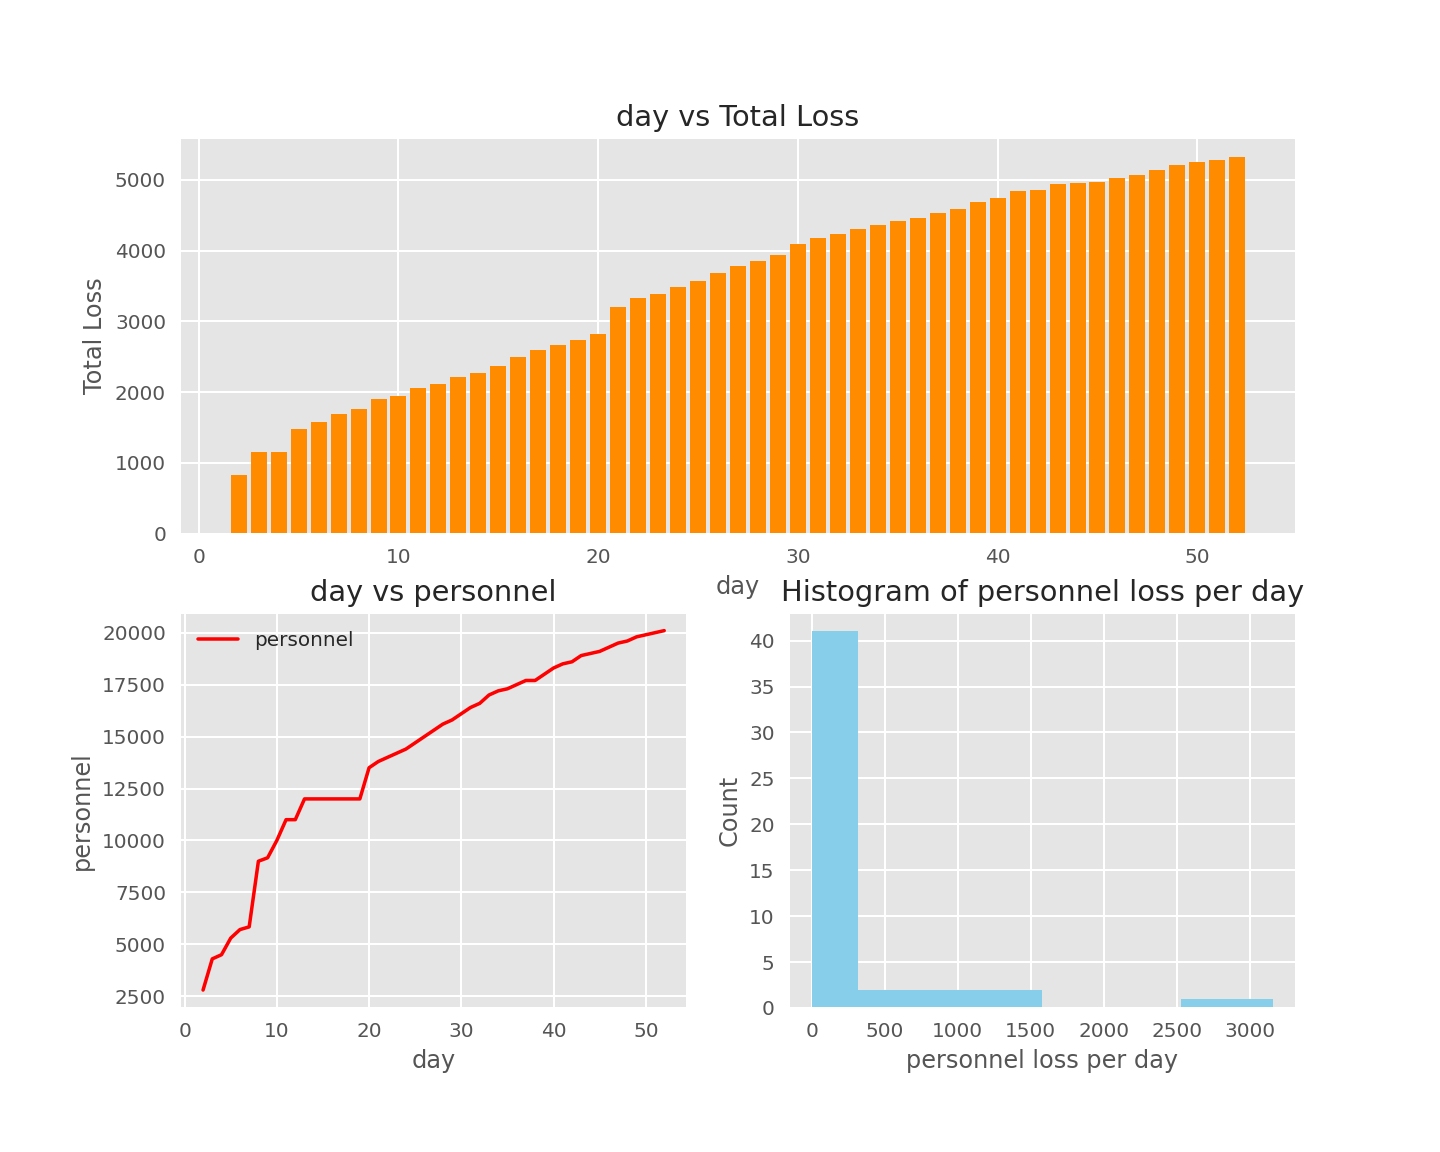

In [8]:
import panel as pn
pn.extension()

kw = dict(plot1_f1="day",
          plot1_f2=[ 'Total','aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
          plot2_f=['personnel', 'POW'],
          plot3_f=['personnel loss per day', 'equipment loss per day'])

dash1 = pn.interact(create_figure, **kw)

dash1 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash1

For This interactive plot we have included here has 3 drop downs to include interactivity.
### Dropdown 1: 
Total equipment loss, each individual equipment type loss
### Dropdown 2: 
Personnel and POW options
### Dropdown 3: 
Personnel loss and equipment loss

The three plots included in this visualization have:

### Plot 1: 
This plot has a bar chart that shows the loss of equipment in the Ukraine-Russia war vs the days of the war. This is controlled. The x axis shows the days of the war. The y axis shows the loss of equipment. 

### Plot 2: 
The second plot shows the Prisioner of War and personnel taken over the days of war. This includes a drop down to switch between POW and personnel. The x axis shows the day of the war. The y axis shows either POW or Personnel based on the dropdown.

### Plot 3:
The third plot shows the equipment loss per day and the personnel loss per day in the form of a histogram. There is a dropdown to switch between the two. The x axis shows the equipment loss per day or the personnel loss per day based on the drop down selection. The y axis shows the count of loss.

# Section 2

Under this section, we have gone ahead and used the twitter dataset to come up with contextual visualizations

## Code used for Data Cleaning 

csv_collection = []
for dirname, _, filenames in os.walk('war_tweets'):
    for filename in filenames:
        fullpath= os.path.join(dirname, filename)
        csv_collection.append(fullpath)
        

df = pd.read_csv(csv_collection.pop(),compression = 'gzip', index_col=0)
for data in csv_collection:
    try:
        tmp = pd.read_csv(data, compression = 'gzip', index_col=0)
    except:
            tmp = pd.read_csv(data, index_col = 0)
            df = pd.concat([df, tmp], axis=0)

df.drop("acctdesc", axis=1, inplace=True)
df.drop("text", axis=1, inplace=True)
df.drop("hashtags", axis=1, inplace=True)

In [9]:
df2 = pd.read_csv("tweets_clean_data_test.csv") # Clean data

In [10]:
df2.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,retweetcount,language
0,1.400000e+18,RealBitstarz,"Phoenix, AZ",169,16,1573,08:12.0,1.510000e+18,0,en
1,2.722503e+09,vubblePOP,Everywhere,2176,3176,62609,38:54.0,1.510000e+18,0,en
2,1.283664e+08,am_queretaro,"Querétaro, México.",287,179968,231246,46:52.0,1.510000e+18,0,es
3,1.440000e+18,wtxnewsusa,New York,44,140,3470,33:25.0,1.510000e+18,0,en
4,1.250000e+18,Jclami1,NaN,290,19,2957,10:56.0,1.510000e+18,164,es


## Languages most used for tweeting

Twitter is a platform used for several purposes. For sharing information, political point of views, announcements etc. It is a global platform with its users from different countries and different socio-cultural backgrounds.  Since the war broke out between the two countries, twitter has been flooded with tweets about the same. The languages most used for tweeting about this conflict are displayed below. English, German, Italian and French are the top languages that have been used in the tweets about the Russo-Ukranian war.

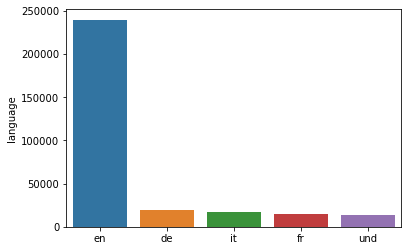

In [11]:
sns.barplot(x= df2.language.value_counts()[:5].index,y=df2.language.value_counts()[:5])

## Traffic Source Location

The maximum number of tweets generated about this global issue were from the victim nation of Ukraine. As the visualization depicts, around 3500 tweets were generated from Ukraine during the initial days of the war. Despite of having a major blow to the network infrastructure, Ukrainians kept the world informed about the current situation of their home. Further, USA, UK, France and India generated the most traffic of tweets on this topic.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

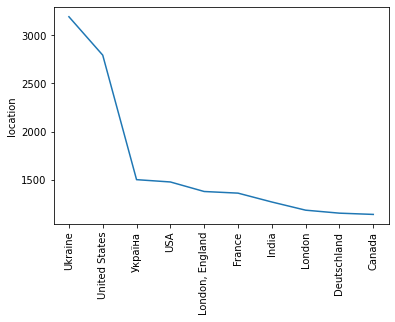

In [12]:
sns.lineplot(x= df2.location.value_counts()[:10].index,y=df2.location.value_counts()[:10])
plt.xticks(rotation=90)

## Users with most Retweets

The following scatterplot indicates the top 10 users with most retweets. It is interesting to know that the user with most retweets has been retweeted around 80,000 times. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

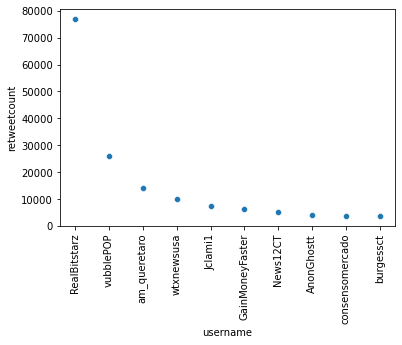

In [13]:
sns.scatterplot(x= df2.username[:10],y=df2.retweetcount.value_counts()[:10])
plt.xticks(rotation=90)

## REFERENCES

1. Primary dataset: This includes the equipment and personnel loss during the Ukraine-Russia war
https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

2. This is a dataset based on tweets about the ukraine-russia crisis
https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-million-rows    